In [ ]:
"""
Takes a stock
=> 6 months price actions
=> Implements 2 Week Moving average
=> Gets the result

=> Takes the latest news from the Internet

=> LLM => Finalize whether to buy or not.
"""

In [1]:
# libraries

# data loading NSE
import nsepython

import matplotlib.pyplot as plt
# math operations

# llm | Ollama | Llama3.2
from ollama import chat
from ollama import ChatResponse

In [3]:
stock = "ONGC"

In [4]:
# Step 1:>
# Download Six months of stock data
series = "EQ"
start_date = "01-06-2024"
end_date ="20-12-2024"
data = nsepython.equity_history(stock,series,start_date,end_date)


In [5]:
adj_price = data['CH_CLOSING_PRICE'].astype(float)

In [7]:
# 5 day vs 20 day :>
no_days = 5
# calculate the moving average
mav_5 = adj_price.rolling(window=no_days).mean()

no_days = 20
# calculate the moving average
mav_20 = adj_price.rolling(window=no_days).mean()

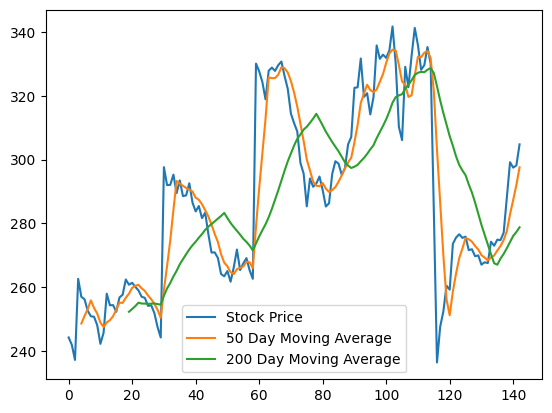

In [11]:
# import the matplotlib package 
# to see the plot
import matplotlib.pyplot as plt

adj_price.plot()
mav_5.plot()
mav_20.plot()

plt.legend(['Stock Price','50 Day Moving Average', '200 Day Moving Average']) 

plt.show()

In [12]:
stock_company_name = "DRONE DESTINATION"
news = "DRONE DESTINATION: CO WINS CONTRACT FROM SURVEY OF INDIA FOR 2D/3D URBAN MAPPING - SME"

In [13]:
## Latest News :> 
Prompt = f"""
You are an expert stock analyzer. You are capable of analyzing the performance of a stock based on the latest news. 
Here is the stock company: {stock_company_name}

Here is the latest news: 
{news}

Now based on the news, tell me whether to invest in the stock or not. Give me proper explanation for your recommendation.
"""

In [15]:
print(Prompt)


You are an expert stock analyzer. You are capable of analyzing the performance of a stock based on the latest news. 
Here is the stock company: DRONE DESTINATION

Here is the latest news: 
DRONE DESTINATION: CO WINS CONTRACT FROM SURVEY OF INDIA FOR 2D/3D URBAN MAPPING - SME

Now based on the news, tell me whether to invest in the stock or not. Give me proper explanation for your recommendation.



In [17]:
# LLama model :> 
response: ChatResponse = chat(model='llama3.2:latest', messages=[
  {
    'role': 'user',
    'content': Prompt,
  },
])



In [18]:
print(response['message']['content'])

Based on the latest news, I would recommend buying DRONE DESTINATION (DRNE) stock with caution.

The company has won a significant contract from Survey of India for 2D/3D urban mapping, which is a promising development. Here's why:

1. **Contract value**: Although the exact value of the contract isn't mentioned in the news article, a contract win from a reputable client like Survey of India indicates a level of confidence in DRONE DESTINATION's capabilities.
2. **Growth potential**: The urban mapping market is expected to grow rapidly as cities worldwide adopt more advanced infrastructure and require precise mapping solutions for planning, management, and monitoring.
3. **Diversified revenue streams**: Winning contracts from government agencies like Survey of India demonstrates the company's ability to secure revenue through a mix of government and private sector clients.

However, there are also some cautious notes:

1. **Competitive landscape**: The urban mapping market is highly com

In [29]:
# In a single cel ::> 
stock = "DRONE"
company_name = "Drone Destination Limited"
news = "DRONE DESTINATION: CO WINS CONTRACT FROM SURVEY OF INDIA FOR 2D/3D URBAN MAPPING - SME"

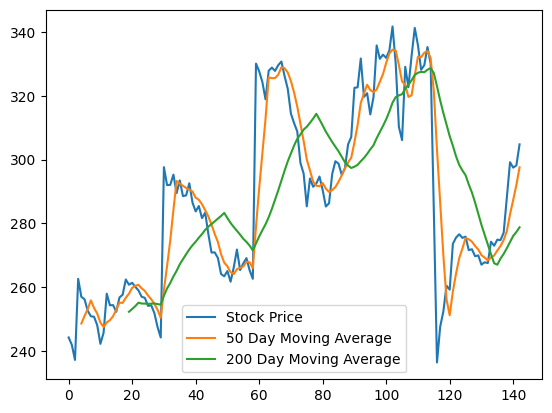

Based on the latest news, I would recommend:

{'Recommended Action': 'Buy', 'Reasoning': 'The recent contract win from Survey of India for 2D/3D urban mapping is a significant milestone for Drone Destination Limited. This contract indicates a strong demand for the company's services and products, which could lead to increased revenue and growth prospects. Additionally, the fact that it is a government contract suggests a level of credibility and trust in the company\'s capabilities. Therefore, considering this positive development, I recommend investing in the stock.'}


In [30]:
# Step 1:>
# Download Six months of stock data
series = "EQ"
start_date = "01-06-2024"
end_date ="20-12-2024"
data = nsepython.equity_history(stock,series,start_date,end_date)

adj_price.plot()
mav_5.plot()
mav_20.plot()

plt.legend(['Stock Price','50 Day Moving Average', '200 Day Moving Average']) 

plt.show()
empty_format = {"Recommended Action":"Buy/Sell/BeCautious", "Reasoning":""}

Prompt = f"""
You are an expert stock analyzer. You are capable of analyzing the performance of a stock based on the latest news. 
Here is the stock company: {company_name}

Here is the latest news: 
{news}

Now based on the news, tell me whether to invest in the stock or not. Give me in following json format 
{empty_format}
"""

response: ChatResponse = chat(model='llama3.2:latest', messages=[
  {
    'role': 'user',
    'content': Prompt,
  },
])

print(response['message']['content'])